In [1]:
cd ../../code/

/home/wenfeng/repos/MLAlg/code


In [2]:
import sklearn.svm as sksvm
import numpy as np
import utils
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, load_digits
from svm import svm

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Preparing the Data

In [3]:
# Dataset 1
X, y = utils.load_simple_data()

# Dataset 2
# np.random.seed(2)
# X, y = make_moons(1000, noise=0.12)
# y = 2 * y - 1

In [4]:
X.shape, y.shape

((100, 2), (100,))

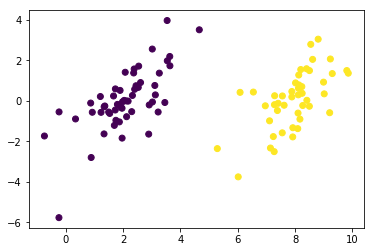

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y+1)

## Linear SVM(Version 1)
1. First use support vectors to compute $w$ and $b$
2. Then plot the decision boundary

In [6]:
# %%timeit -r 1 -n 1
cls = svm.SVMLinear()
cls.fit(X, y, seed=2)
print(cls)
print('#Support vectors:', len(cls.sv))

Done in 41 loops.
SVMLinear(C=1, tau=1e-12, eps=0.001, kernel=LinearKernel(), solver=WSS3Solver(C=1, kf=LinearKernel(), eps=0.001, tau=1e-12))
#Support vectors: 3


(-6.266721, 4.46496)

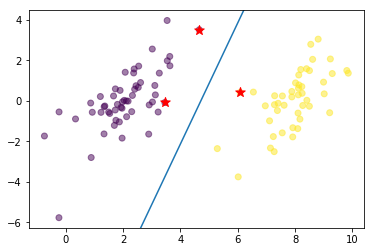

In [7]:
w1, w2 = cls.w[0, 0], cls.w[1, 0]
b = cls.b
xmax, xmin = X[:, 0].max(), X[:, 0].min()
y1 = -w1*xmax/w2 - b/w2
y2 = -w1*xmin/w2 - b/w2

plt.scatter(X[:, 0], X[:, 1], c=y+1, alpha=0.5)

plt.scatter(X[cls.sv, 0], X[cls.sv, 1], c='r', marker='*', s=100)

plt.plot([xmax, xmin], [y1, y2])
plt.ylim([X[:, 1].min()-0.5, X[:, 1].max()+0.5])

In [8]:
print('Accuracy: %.4f' % (np.mean(cls.predict(X) == y)))

Accuracy: 1.0000


## Linear SVM(Version 2)
1. Use support vectors to perform prediction
2. Do not compute the parameter $w$

In [9]:
cls = svm.SVM(kernel='linear')
cls.fit(X, y)
print(cls)
print('#Support vectors:', np.sum(cls.A > 0))

Done in 41 loops.
SVM(C=1, tau=1e-12, eps=0.001, kernel=LinearKernel(), solver=WSS3Solver(C=1, kf=LinearKernel(), eps=0.001, tau=1e-12))
#Support vectors: 3


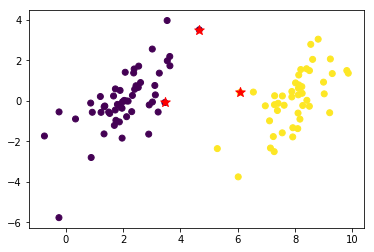

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=cls.predict(X)+1)
flag = cls.sv
plt.scatter(X[flag, 0], X[flag, 1], c='r', marker='*', s=100)

## Gaussian Kernel(RBF)

In [11]:
# %%timeit -r 1 -n 1
kernel = svm.RBFKernel(sigma=0.5)
cls = svm.SVM(kernel=kernel)
cls.fit(X, y)
print('#Support vectors:', len(cls.sv))

Done in 298 loops.
#Support vectors: 61


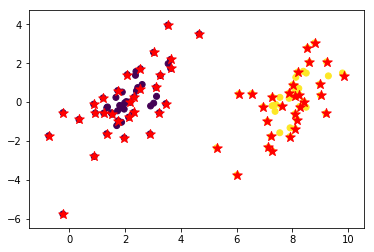

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=cls.predict(X)+1)
flag = cls.sv
plt.scatter(X[flag, 0], X[flag, 1], c='r', marker='*', s=100)

In [13]:
print('Accuracy: %.4f' % (np.mean(cls.predict(X) == y)))

Accuracy: 1.0000


## Polynormal Kernel

In [14]:
cls = svm.SVM(C=1, kernel=svm.KERNELS['poly'](c=1, d=3))
cls.fit(X, y)
print('#Support vectors:', len(cls.sv))

Done in 21 loops.
#Support vectors: 4


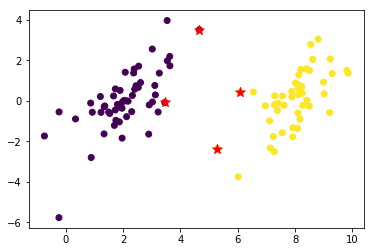

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=cls.predict(X)+1)
flag = cls.sv
plt.scatter(X[flag, 0], X[flag, 1], c='r', marker='*', s=100)

In [16]:
print('Accuracy: %.4f' % (np.mean(cls.predict(X) == y)))

Accuracy: 1.0000


## Digit Classification with RBF kernel

In [17]:
data, target = load_digits(return_X_y=True)
data /= 255.
Yt = np.zeros_like(target)
Yt[target == 5] = 1
Yt[target != 5] = -1

In [18]:
data.shape, Yt.shape

((1797, 64), (1797,))

In [19]:
# %%timeit -n 1 -r 1
kernel=svm.RBFKernel(sigma=0.08)
cls = svm.SVM(kernel=kernel)
cls.fit(data, Yt)
print('#Support vectors:', len(cls.sv))

Done in 460 loops.
#Support vectors: 207


In [20]:
print('Accuracy: %.4f' % (np.mean(cls.predict(data) == Yt)))

Accuracy: 1.0000


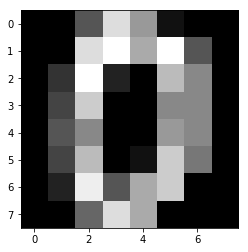

In [21]:
plt.imshow(data[0].reshape(8, 8), cmap='gray')